# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [8]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [9]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [10]:
# Agrupando os dados por munResNome e calculando a idade média das mães e dos pais
idade_media = df.groupby('munResNome').agg({'IDADEMAE': 'mean', 'IDADEPAI': 'mean'}).reset_index()

# Renomeando as colunas para maior clareza
idade_media.columns = ['munResNome', 'Idade Média Mãe', 'Idade Média Pai']

print(idade_media)



                   munResNome  Idade Média Mãe  Idade Média Pai
0       Alta Floresta D'Oeste        25.991826        29.548701
1     Alto Alegre dos Parecis        24.844156        29.179104
2                Alto Paraíso        24.960177        28.833333
3            Alvorada D'Oeste        25.770732        30.757282
4                   Ariquemes        25.607866        32.466667
5                     Buritis        25.559177        30.812500
6                      Cabixi        26.037500        34.333333
7                 Cacaulândia        25.546667        36.333333
8                      Cacoal        26.890102        30.931854
9      Campo Novo de Rondônia        24.825301        30.500000
10         Candeias do Jamari        25.243323        29.894737
11               Castanheiras        27.281250        30.392857
12                 Cerejeiras        27.240506        31.652778
13                Chupinguaia        25.333333        29.629630
14          Colorado do Oeste        27.

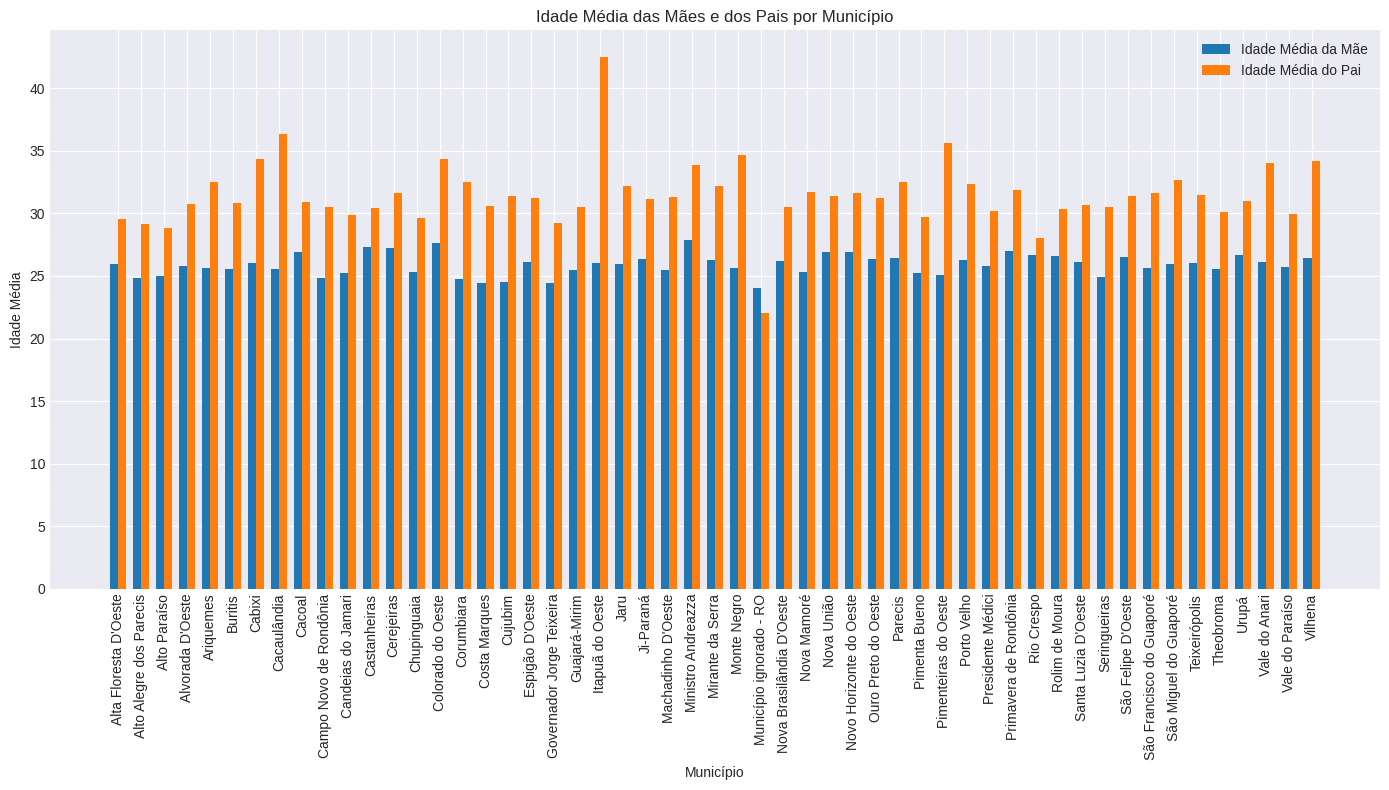

In [16]:
# Definindo os dados
munResNome = idade_media['munResNome']
idade_media_mae = idade_media['Idade Média Mãe']
idade_media_pai = idade_media['Idade Média Pai']

# Definindo a largura da barra
largura_barra = 0.35

# Definindo a posição das barras no eixo x
posicoes = range(len(munResNome))

# Criando o gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
plt.bar(posicoes, idade_media_mae, largura_barra, label='Idade Média da Mãe')
plt.bar([pos + largura_barra for pos in posicoes], idade_media_pai, largura_barra, label='Idade Média do Pai')

# Adicionando rótulos e título
plt.xlabel('Município')
plt.ylabel('Idade Média')
plt.title('Idade Média das Mães e dos Pais por Município')
plt.xticks([pos + largura_barra / 2 for pos in posicoes], munResNome, rotation=90)
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


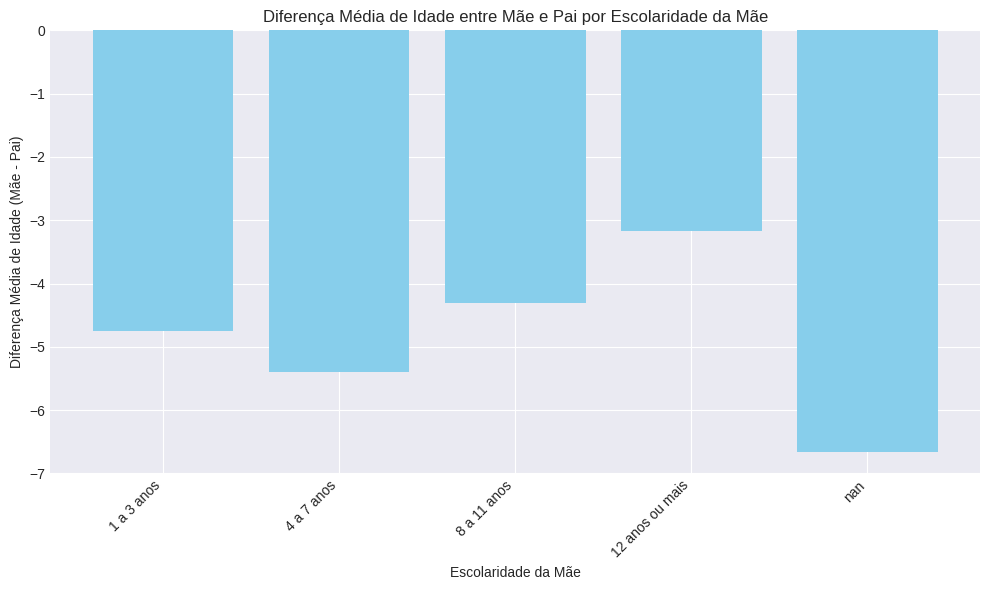

In [21]:
# Calculando a diferença entre a idade da mãe e do pai
df['Diferenca_Idades'] = df['IDADEMAE'] - df['IDADEPAI']

# Agrupando os dados pela escolaridade da mãe e calculando a média da diferença de idades
diferenca_por_escolaridade = df.groupby('ESCMAE')['Diferenca_Idades'].mean().reset_index()

# Ordenando os dados pela ordem de escolaridade
ordem_escolaridade = ['Sem escolaridade', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais', 'Não se aplica']
diferenca_por_escolaridade['ESCMAE'] = pd.Categorical(diferenca_por_escolaridade['ESCMAE'], categories=ordem_escolaridade, ordered=True)
diferenca_por_escolaridade = diferenca_por_escolaridade.sort_values('ESCMAE')

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(diferenca_por_escolaridade)), diferenca_por_escolaridade['Diferenca_Idades'], color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Diferença Média de Idade (Mãe - Pai)')
plt.title('Diferença Média de Idade entre Mãe e Pai por Escolaridade da Mãe')

# Definindo os rótulos do eixo x
plt.xticks(range(len(diferenca_por_escolaridade)), diferenca_por_escolaridade['ESCMAE'], rotation=45, ha='right')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 18/12, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [12]:
# Estou utilizando a data do meu aniversário '18/12', mas, pode ajustar conforme necessário

# Convertendo a coluna de data para o formato datetime
df['DTNASC'] = pd.to_datetime(df['DTNASC'])

# Filtrando os dados para incluir apenas os nascimentos no dia do aniversário
aniversario = df[(df['DTNASC'].dt.day == 18) & (df['DTNASC'].dt.month == 12)]

# Agrupando os dados por sexo e faixa de escolaridade da mãe e calculando o peso médio dos bebês em cada grupo
peso_medio = aniversario.groupby(['SEXO', 'ESCMAE']).agg({'PESO': 'mean'}).reset_index()

# Renomeando as colunas para maior clareza
peso_medio.columns = ['Sexo', 'Escolaridade da Mãe', 'Peso Médio do Bebê']

print(peso_medio)



        Sexo Escolaridade da Mãe  Peso Médio do Bebê
0   Feminino     12 anos ou mais         3071.083333
1   Feminino          4 a 7 anos         3294.400000
2   Feminino         8 a 11 anos         3016.388889
3  Masculino          1 a 3 anos         3052.500000
4  Masculino     12 anos ou mais         3530.500000
5  Masculino          4 a 7 anos         3558.750000
6  Masculino         8 a 11 anos         3159.282051


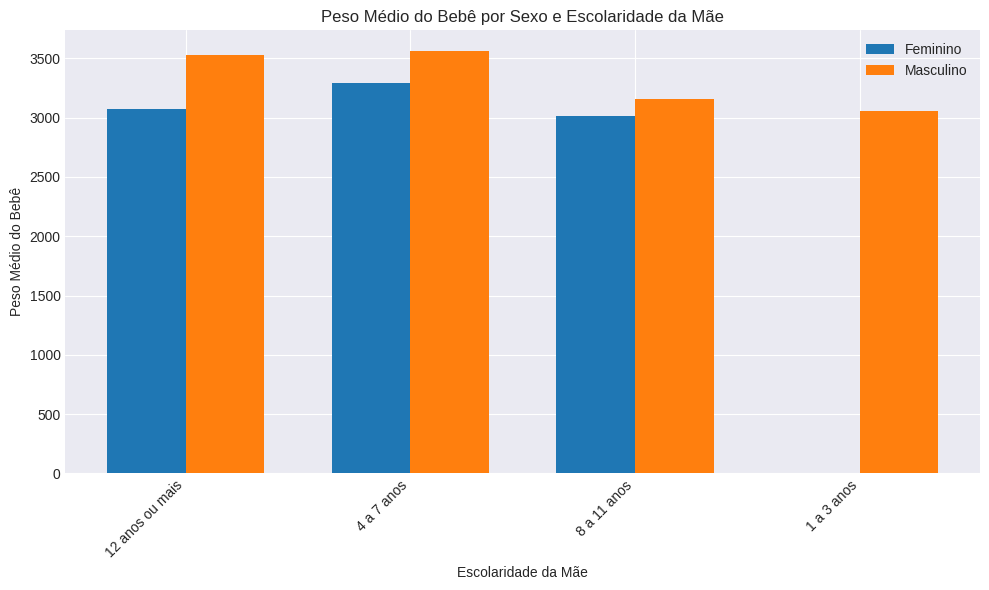

In [23]:
# Dados
sexo = peso_medio['Sexo'].unique()
escolaridade_mae = peso_medio['Escolaridade da Mãe'].unique()
pesos = peso_medio['Peso Médio do Bebê']

# Criando uma matriz vazia para armazenar os pesos
pesos_matrix = np.full((len(sexo), len(escolaridade_mae)), np.nan)

# Preenchendo a matriz com os pesos
for i, row in peso_medio.iterrows():
    s_index = np.where(sexo == row['Sexo'])[0][0]
    e_index = np.where(escolaridade_mae == row['Escolaridade da Mãe'])[0][0]
    pesos_matrix[s_index, e_index] = row['Peso Médio do Bebê']

# Configurações para o gráfico
bar_width = 0.35
index = np.arange(len(escolaridade_mae))

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(sexo)):
    ax.bar(index + i * bar_width, pesos_matrix[i], bar_width, label=sexo[i])

# Adicionando rótulos
ax.set_xlabel('Escolaridade da Mãe')
ax.set_ylabel('Peso Médio do Bebê')
ax.set_title('Peso Médio do Bebê por Sexo e Escolaridade da Mãe')
ax.set_xticks(index + bar_width * (len(sexo) - 1) / 2)
ax.set_xticklabels(escolaridade_mae)
ax.legend()

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [13]:
# Filtrando os dados para incluir apenas os nascimentos em 2019
nascimentos_2019 = df[df['DTNASC'].dt.year == 2019]

# Agrupando os dados por município e contando o número de nascimentos em cada município
nascimentos_por_municipio = nascimentos_2019.groupby('munResNome').size().reset_index(name='NumNascimentos')

# Encontrando o município com o menor número de nascimentos
municipio_menos_nascimentos = nascimentos_por_municipio.loc[nascimentos_por_municipio['NumNascimentos'].idxmin()]

# Obtendo o nome do município com o menor número de nascimentos
nome_municipio_menos_nascimentos = municipio_menos_nascimentos['munResNome']

# Filtrando os dados novamente para incluir apenas os registros desse município
dados_municipio_menos_nascimentos = nascimentos_2019[nascimentos_2019['munResNome'] == nome_municipio_menos_nascimentos]

# Calculando a média, máximo e mínimo das idades das mães e dos pais nesse município
idade_media_maes = dados_municipio_menos_nascimentos['IDADEMAE'].mean()
idade_maxima_maes = dados_municipio_menos_nascimentos['IDADEMAE'].max()
idade_minima_maes = dados_municipio_menos_nascimentos['IDADEMAE'].min()

idade_media_pais = dados_municipio_menos_nascimentos['IDADEPAI'].mean()
idade_maxima_pais = dados_municipio_menos_nascimentos['IDADEPAI'].max()
idade_minima_pais = dados_municipio_menos_nascimentos['IDADEPAI'].min()

print("Município com menos nascimentos em 2019:", nome_municipio_menos_nascimentos)
print("Idade média das mães:", idade_media_maes)
print("Idade máxima das mães:", idade_maxima_maes)
print("Idade mínima das mães:", idade_minima_maes)
print("Idade média dos pais:", idade_media_pais)
print("Idade máxima dos pais:", idade_maxima_pais)
print("Idade mínima dos pais:", idade_minima_pais)


Município com menos nascimentos em 2019: Município ignorado - RO
Idade média das mães: 24.0
Idade máxima das mães: 24
Idade mínima das mães: 24
Idade média dos pais: 22.0
Idade máxima dos pais: 22.0
Idade mínima dos pais: 22.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [14]:
# Filtrando os dados para incluir apenas os nascimentos no mês de março
nascimentos_marco = df[df['DTNASC'].dt.month == 3]

# Agrupando os dados por município e contando o número de nascimentos em cada município
nascimentos_por_municipio = nascimentos_marco.groupby('munResNome').size().reset_index(name='NumNascimentos')

# Encontrando o município com o maior número de nascimentos
municipio_mais_nascimentos = nascimentos_por_municipio.loc[nascimentos_por_municipio['NumNascimentos'].idxmax()]

# Obtendo o nome do município com o maior número de nascimentos
nome_municipio_mais_nascimentos = municipio_mais_nascimentos['munResNome']

# Filtrando os dados novamente para incluir apenas os registros desse município
dados_municipio_mais_nascimentos = nascimentos_marco[nascimentos_marco['munResNome'] == nome_municipio_mais_nascimentos]

# Calculando a média, máximo e mínimo da quantidade de filhos vivos e das idades dos pais nesse município
qtd_filhos_vivos_media = dados_municipio_mais_nascimentos['QTDFILVIVO'].mean()
qtd_filhos_vivos_maxima = dados_municipio_mais_nascimentos['QTDFILVIVO'].max()
qtd_filhos_vivos_minima = dados_municipio_mais_nascimentos['QTDFILVIVO'].min()

idade_media_pais = dados_municipio_mais_nascimentos['IDADEPAI'].mean()
idade_maxima_pais = dados_municipio_mais_nascimentos['IDADEPAI'].max()
idade_minima_pais = dados_municipio_mais_nascimentos['IDADEPAI'].min()

print("Município com mais nascimentos em março:", nome_municipio_mais_nascimentos)
print("Quantidade média de filhos vivos:", qtd_filhos_vivos_media)
print("Quantidade máxima de filhos vivos:", qtd_filhos_vivos_maxima)
print("Quantidade mínima de filhos vivos:", qtd_filhos_vivos_minima)
print("Idade média dos pais:", idade_media_pais)
print("Idade máxima dos pais:", idade_maxima_pais)
print("Idade mínima dos pais:", idade_minima_pais)


Município com mais nascimentos em março: Porto Velho
Quantidade média de filhos vivos: 1.2950558213716108
Quantidade máxima de filhos vivos: 9.0
Quantidade mínima de filhos vivos: 0.0
Idade média dos pais: 34.62903225806452
Idade máxima dos pais: 62.0
Idade mínima dos pais: 19.0


/tmp/ipykernel_6933/4273976414.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


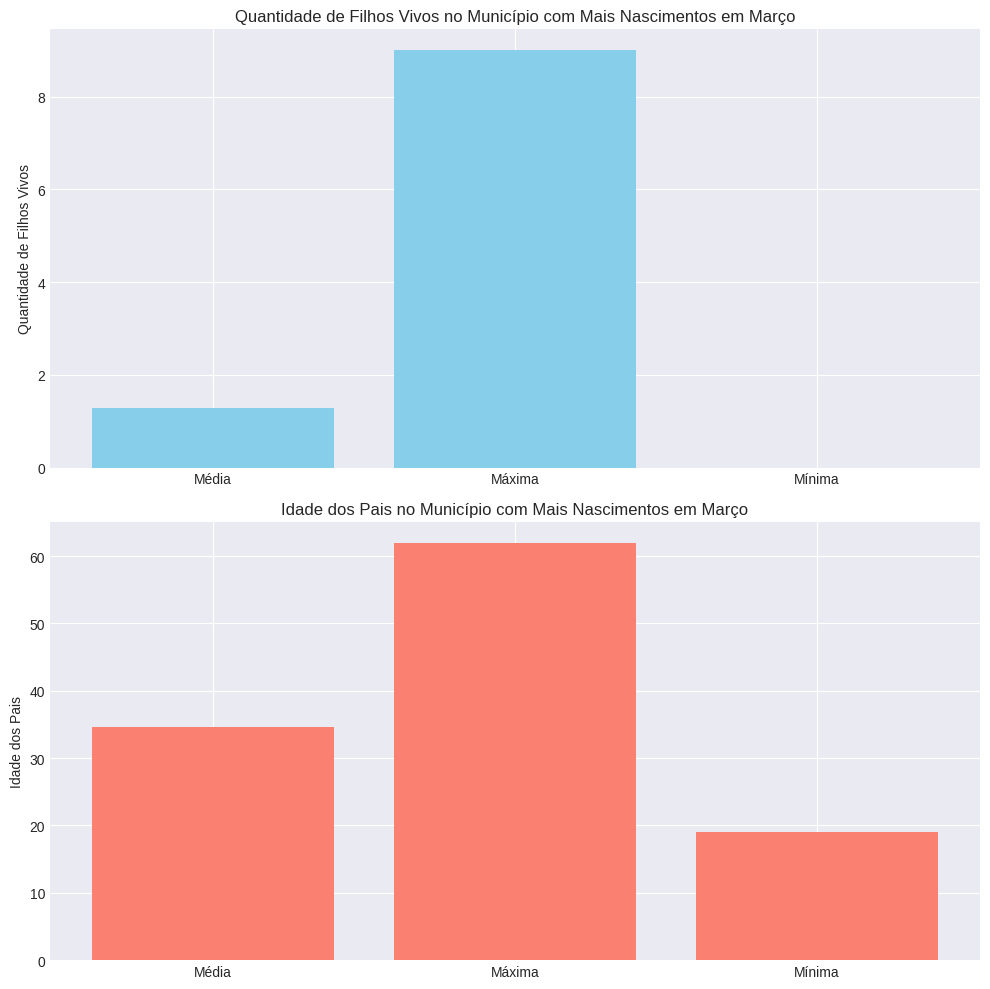

In [15]:
# Configurações de estilo do gráfico
plt.style.use('seaborn-darkgrid')

# Plotagem dos gráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico da quantidade de filhos vivos
axs[0].bar(['Média', 'Máxima', 'Mínima'], [qtd_filhos_vivos_media, qtd_filhos_vivos_maxima, qtd_filhos_vivos_minima], color='skyblue')
axs[0].set_title('Quantidade de Filhos Vivos no Município com Mais Nascimentos em Março')
axs[0].set_ylabel('Quantidade de Filhos Vivos')

# Gráfico das idades dos pais
axs[1].bar(['Média', 'Máxima', 'Mínima'], [idade_media_pais, idade_maxima_pais, idade_minima_pais], color='salmon')
axs[1].set_title('Idade dos Pais no Município com Mais Nascimentos em Março')
axs[1].set_ylabel('Idade dos Pais')

# Exibindo os gráficos
plt.tight_layout()
plt.show()


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

### insight 01

Variação nas Idades Médias: Podemos verificar variações consideráveis entre os municípios, que pode indicar possivelmente diferenças socioeconômicas e culturais entre as regiões;

Idades Médias Próximas: Em alguns municípios, as idades médias das mães e dos pais são relativamente próximas, sugerindo uma tendência para casais com idades semelhantes. Provavelmente devido a escolaridade das mães.

Discrepâncias nas Idades: Podemos verificar discrepâncias significativas entre as idades médias das mães e dos pais, o que pode indicar padrões de fertilidade diferentes ou diferenças na estrutura familiar.

Possíveis Outliers: Alguns municípios parecem apresentar idades médias incomuns, o que pode ser devido a dados incompletos ou à presença de outliers.

Essas observações destacam a importância de considerar o contexto regional ao analisar dados demográficos, já que diversos fatores podem influenciar as características da população em diferentes áreas geográficas.

### insight 02

O peso médio dos bebês varia de acordo com a escolaridade da mãe e o sexo do bebê.

Bebês de mães com escolaridade de 4 a 7 anos apresentam o maior peso médio, tanto para o sexo feminino quanto para o sexo masculino.

Bebês de mães com escolaridade de 12 anos ou mais têm o segundo maior peso médio, com uma diferença considerável em relação aos bebês de mães com outras faixas de escolaridade.

Para bebês do sexo feminino, a escolaridade da mãe parece ter um impacto menor no peso médio, com uma variação menor entre as diferentes faixas de escolaridade.

Para bebês do sexo masculino, observa-se uma variação mais acentuada no peso médio entre as diferentes faixas de escolaridade da mãe, com os bebês de mães com escolaridade de 4 a 7 anos e 12 anos ou mais apresentando os maiores pesos médios.

A escolaridade da mãe pode desempenhar um papel importante na saúde e no desenvolvimento do bebê, e esses resultados sugerem uma possível correlação entre a escolaridade materna e o peso médio do recém-nascido.

### insight 03

O município com menos nascimentos em 2019 foi "Município ignorado - RO". Isso pode indicar 
uma possível subnotificação de dados ou outras questões relacionadas à coleta de informações
sobre nascimentos nesse município.

A idade média das mães nesse município foi de 24 anos, com a idade mínima e máxima também 
sendo 24 anos. Isso sugere uma homogeneidade na faixa etária das mães que deram à luz nesse 
município em 2019.

A idade média dos pais foi de 22 anos, com a idade mínima e máxima também sendo 22 anos. 
Novamente, isso sugere uma homogeneidade na faixa etária dos pais envolvidos nos nascimentos
registrados nesse município em 2019.

A discrepância entre a idade média das mães (24 anos) e dos pais (22 anos) pode indicar 
diferenças nas idades dos parceiros ou outros fatores socioeconômicos que influenciam a 
maternidade e paternidade em diferentes faixas etárias.

#### insight 04

O município com mais nascimentos em março foi Porto Velho. Isso pode refletir uma variedade de fatores, como a densidade populacional, acesso a serviços de saúde, políticas de saúde pública e outras questões demográficas.

A quantidade média de filhos vivos por família em Porto Velho durante o mês de março foi de aproximadamente 1,3. Isso indica uma média moderada de filhos por família, o que pode refletir dinâmicas familiares e sociais na região.

O número máximo de filhos vivos em uma família foi de 9, enquanto o mínimo foi de 0. Essa ampla variação pode sugerir diferentes realidades socioeconômicas e culturais dentro do município.

A idade média dos pais dos bebês nascidos em Porto Velho durante março foi de aproximadamente 34,6 anos. Isso sugere que a paternidade nesse município é distribuída entre diferentes faixas etárias, com uma média relativamente alta em comparação com a média nacional.

A idade mínima registrada para os pais foi de 19 anos, enquanto a idade máxima foi de 62 anos. Isso mostra uma ampla gama de idades entre os pais dos bebês nascidos em Porto Velho em março, refletindo a diversidade demográfica e as diferentes circunstâncias individuais dos pais.

